# 筛选基金，绘制同类收益率排名直方图

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 使用的数据描述

1. 已经经过初筛

2. 排除了数据缺失的基金

3. 若目前没有回复限额的基金，则基金暂停申购天数计算至2020-04-30

In [4]:
df=pd.read_csv('./xls/fund.csv',encoding='gbk')
df['scale']=df[['scale2018','scale2019','scale2020']].min(axis=1)  # 得到三年间的最小规模
df=df[df['scale']>1] # 剔除规模小于1亿的
df=df[df['types']!='被动指数型基金'] # 删除被动指数型基金
df_len=len(df)
print(df_len)
df.tail()

404


,code,name,pause_start,pause_end,limit_amount,limit_days,types,est_years,rank,minus_benchmark,scale2018,scale2019,scale2020,end_flag,scale
1122,270030.OF,广发聚财信用债券B,2014/4/21,2020/4/30,1000.0,2201,混合债券型基金（一级）,8.136986,52.816901,3.24,2.230779,2.902601,2.240604,1,2.230779
1124,485011.OF,工银瑞信双利债券B,2013/8/5,2020/4/30,100.0,2460,混合债券型基金（二级）,9.712329,14.656690,3.99,3.437646,19.513382,59.055531,1,3.437646
1125,485111.OF,工银瑞信双利债券A,2013/8/5,2020/4/30,100.0,2460,混合债券型基金（二级）,9.712329,13.908451,4.31,55.755745,67.330021,188.959492,1,55.755745
1126,070002.OF,嘉实增长混合,2010/6/23,2020/4/30,10.0,3599,平衡混合型基金,16.821918,16.376423,34.20,22.008906,17.908015,23.673684,1,17.908015
1129,020002.OF,国泰金龙债券A,2008/11/21,2020/4/30,500.0,4178,混合债券型基金（一级）,16.413699,53.829225,-0.45,9.818163,1.132935,1.105124,1,1.105124


In [3]:
df.describe()

,limit_amount,limit_days,est_years,rank,minus_benchmark,scale2018,scale2019,scale2020,end_flag,scale
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,336.047237,589.049505,6.312146,48.234815,9.883614,10.733235,9.616641,13.008816,0.633663,7.074259
std,1195.593574,583.973305,3.804473,29.725887,16.219922,14.800371,14.870975,21.815292,0.482400,11.424296
min,0.001000,30.000000,2.345205,0.200938,-16.390000,1.002436,1.001043,1.001447,0.000000,1.001043
25%,5.000000,184.750000,3.604795,21.821493,-1.532500,2.514203,1.797850,2.354860,0.000000,1.516285
50%,50.000000,310.000000,4.876712,49.682807,5.600000,5.530481,4.402749,5.211059,1.000000,3.061919
75%,300.000000,1016.500000,7.746575,76.203681,18.675000,11.086769,10.223578,13.513926,1.000000,7.528087
max,20000.000000,4178.000000,17.991781,96.584059,84.830000,109.809997,115.114358,188.959492,1.000000,105.332783


In [4]:
def filter(dff,amount=(None,None),limit_days=(None,None),est_years=(None,None),scale=(None,None),end_flag=None):
    if amount[1]:
        dff=dff[dff['limit_amount']<amount[1]] # 大额申购额度限制额最大值
    if amount[0]:
        dff=dff[dff['limit_amount']>amount[0]] # 大额申购额度限制额最小值
           
    if limit_days[1]:
        dff=dff[dff['limit_days']<limit_days[1]] # 大额申购限制天数最大值
    if limit_days[0]:
        dff=dff[dff['limit_days']>limit_days[0]] # 大额申购限制天数最小值           
    
    if est_years[1]:
        dff=dff[dff['est_years']<est_years[1]] # 基金成立时长最大值
    if est_years[0]:
        dff=dff[dff['est_years']>est_years[0]] # 基金成立时长最小值
           
    if scale[1]:
        dff=dff[dff['scale']<scale[1]] # 基金规模限制最大值
    if scale[0]:
        dff=dff[dff['scale']>scale[0]] # 基金规模限制最小值
        
    if end_flag!=None:
        dff=dff[dff['end_flag']==end_flag] # 基金是否已经取消限购，为1则未取消，为0则已取消
#     elif end_flag==0:
#         dff=dff[dff['end_flag']==0]


    print('该筛选条件下基金数量：',len(dff),'       基金百分比排名均值：',dff['rank'].mean())
    dff['rank'].plot.hist()


    return dff

## 2. 直方图情况
### 2.1 初始数据的直方图情况


该筛选条件下基金数量： 404        基金百分比排名均值： 48.234815458126235


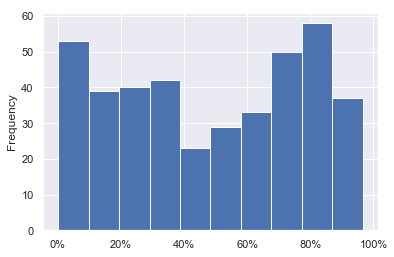

In [5]:
%matplotlib inline
sns.set()
from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%.0f'%(1 * temp) + '%'
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
print('该筛选条件下基金数量：',len(df),'       基金百分比排名均值：',df['rank'].mean())

df['rank'].plot.hist()
plt.show()

### 2.2 筛选单日申购上限

该筛选条件下基金数量： 323        基金百分比排名均值： 45.77261218358205


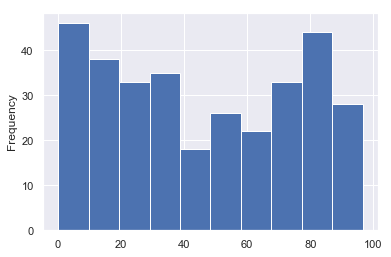

In [6]:
dff=filter(df,amount=(1,10000)) # 单日申购上限（万元）


### 2.3 筛选基金成立时长

该筛选条件下基金数量： 182        基金百分比排名均值： 35.7347410822912


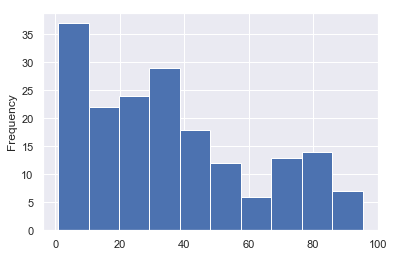

In [7]:
dff=filter(df,est_years=(5,None)) # 基金成立时长（年）


### 2.4 筛选暂停大额申购天数

该筛选条件下基金数量： 73        基金百分比排名均值： 42.54707112715068


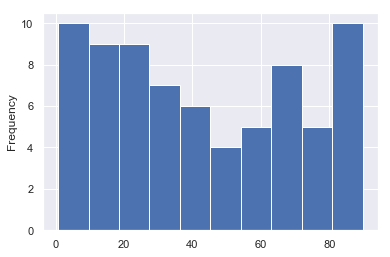

In [8]:
dff=filter(df,limit_days=(60,200)) # 暂停大额申购天数（天）


### 2.5 筛选基金管理规模

该筛选条件下基金数量： 404        基金百分比排名均值： 48.234815458126235


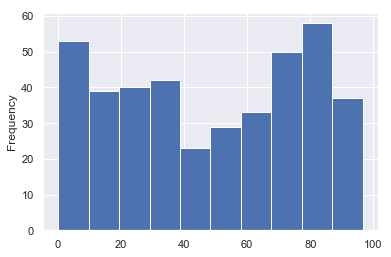

In [9]:
dff=filter(df,scale=(1,None)) # 基金管理规模（亿元）


### 2.6 其他各种复合筛选
1. amount: 单日申购上限（万元）
2. limit_days: 暂停大额申购天数（天）
3. est_years: 基金成立时长（年）
4. scale: 基金管理规模（亿元）

该筛选条件下基金数量： 88        基金百分比排名均值： 33.411666266647714


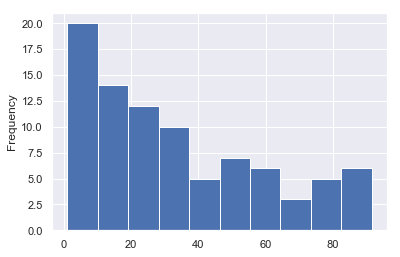

In [10]:
dff=filter(df,amount=(1,10000),limit_days=(60,None),est_years=(5,None),scale=(2,None)) #  单日申购上限（万元），暂停大额申购天数（天），基金成立时长（年），基金管理规模（亿元）


## 考虑是否停止限购

1. 已经停止限购

2. 未停止限购且限购天数已经超过XX天


该筛选条件下基金数量： 148        基金百分比排名均值： 35.34971131237162


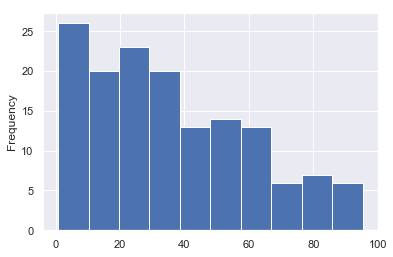

In [11]:
dff=filter(df,end_flag=0) #  是否已经停止限购，为1则未取消，为0则已取消


该筛选条件下基金数量： 256        基金百分比排名均值： 55.68401629239066


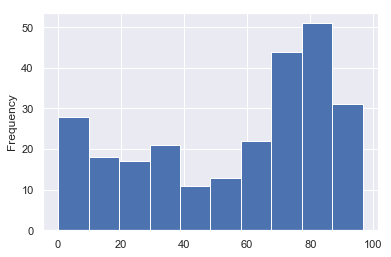

In [12]:
dff=filter(df,end_flag=1,limit_days=(None,None)) #  是否已经停止限购，为1则未取消，为0则已取消


未停止限购，且时间很长的基金收益率均值表现较差

该筛选条件下基金数量： 91        基金百分比排名均值： 57.93268614915386


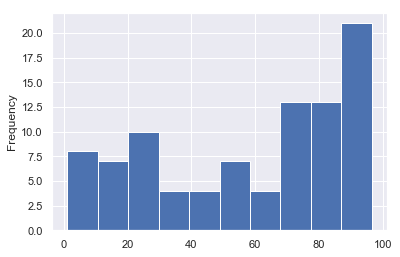

In [13]:
dff=filter(df,end_flag=1,limit_days=(1000,None)) #  是否已经停止限购，为1则未取消，为0则已取消

## 3. 分组绘制平均收益率的图形

* 将初筛后的基金数据按照四个指标，从小到大分为十组

* 计算每组的平均百分比排名情况

In [14]:

def group_by_indicator(indicator,N=10,df_now=df):
    dfs=df_now.sort_values(by=indicator)
    
    df_len=len(dfs) # 重新定义了一下df_len，传入该函数的df长度,为函数内部参数
    print('分为 {} 个组，每组包含基金 {} 支'.format(N,int(df_len/N)))
    avg_list=[]
    sdf_list=[]
    for i in range(N):# 分成十组
        small_df=dfs.iloc[int(i*df_len/N):int((i+1)*df_len/N)]
        sdf_list.append(small_df['rank'])
        start_=small_df[indicator].min()
        end_=small_df[indicator].max()
        avg_list.append([start_,end_,small_df['rank'].mean()])
    df_group=pd.DataFrame(avg_list,columns=['起始','结束','业绩百分比排名均值'])
    
    def to_percent(temp, position):
        return '%.0f'%(1 * temp) + '%'
    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    
    # print(sdf_list)
    plt.boxplot(sdf_list)
    plt.plot([x+1 for x in range(N)],[50]*N,'b--',linewidth=2)

    plt.xlabel('Groups',fontdict={'size':14})
    plt.ylabel('Avg Rank',fontdict={'size':14})
    plt.title('Avg Rank of Different Group (Smaller is better)',fontdict={'size':16})
    
    # 其他的画图尝试，不用的
    # df_group['业绩百分比排名均值'].plot()
    # plt.bar([x for x in range(N)],df_group['业绩百分比排名均值']-50,color='lightblue') #用条形图的方式


    print(df_group)

### 3.1 按照单日申购的金额的限制分组

分为 10 个组，每组包含基金 40 支
         起始       结束  业绩百分比排名均值
0     0.001      0.5  57.470631
1     0.500      1.0  58.997827
2     5.000     10.0  53.272223
3    10.000     10.0  51.504261
4    10.000     50.0  58.289035
5    50.000    100.0  47.940581
6   100.000    100.0  33.606224
7   100.000    500.0  44.231672
8   500.000   1000.0  35.734615
9  1000.000  20000.0  41.199749


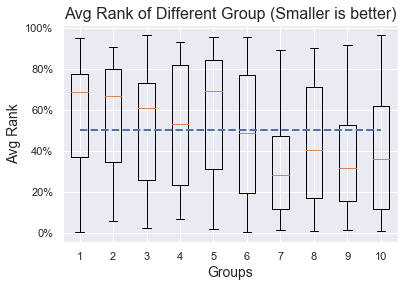

In [15]:
group_by_indicator(indicator='limit_amount')


### 3.2 按照已经实行限制的天数分组

分为 20 个组，每组包含基金 20 支
      起始    结束  业绩百分比排名均值
0     30    37  31.643223
1     37    60  23.840820
2     65   122  36.761336
3    126   154  48.629423
4    160   184  36.244548
5    185   220  49.897967
6    221   252  45.627764
7    253   269  73.497553
8    269   290  57.258963
9    290   310  65.694872
10   310   366  53.323170
11   366   423  44.439863
12   423   618  36.381129
13   626   736  38.532480
14   742  1015  37.839461
15  1021  1113  49.980119
16  1115  1217  68.918347
17  1226  1389  56.596594
18  1406  1640  66.906933
19  1675  4178  43.180728


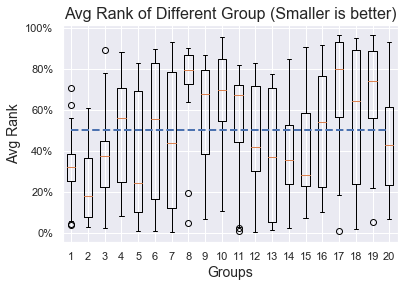

In [16]:
group_by_indicator(indicator='limit_days',N=20) # 改变参数N可选择分组的个数

### 3.3 按照基金的成立时长分组

分为 10 个组，每组包含基金 40 支
          起始         结束  业绩百分比排名均值
0   2.345205   3.227397  51.569511
1   3.263014   3.449315  63.967699
2   3.449315   3.915068  55.374274
3   3.950685   4.336986  63.708196
4   4.336986   4.876712  54.781186
5   4.876712   5.139726  64.020006
6   5.180822   6.728767  45.266126
7   6.747945   8.980822  30.517809
8   9.106849  12.052055  26.405465
9  12.101370  17.991781  27.360518


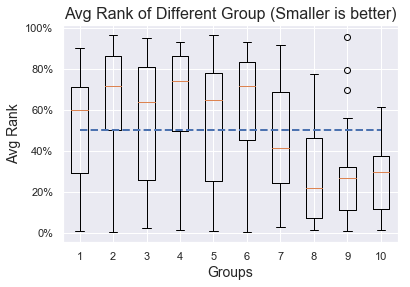

In [17]:
group_by_indicator(indicator='est_years')

### 3.4 按照基金的资产管理规模分组

分为 10 个组，每组包含基金 40 支
          起始          结束  业绩百分比排名均值
0   1.001043    1.137697  49.200994
1   1.141299    1.330627  48.277166
2   1.331230    1.665352  47.374498
3   1.681007    2.032300  49.145940
4   2.068758    3.016095  59.614971
5   3.107743    4.272408  56.213297
6   4.400452    6.378587  52.247680
7   6.418083    8.990369  51.773721
8   9.003961   16.708558  37.917119
9  17.518775  105.332783  30.670410


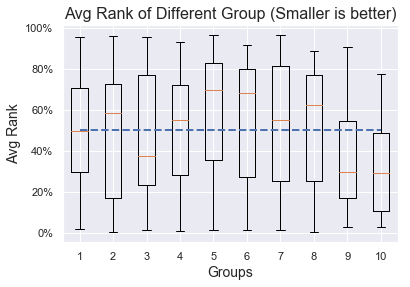

In [18]:
group_by_indicator(indicator='scale')

## 尝试直接画图

基金建立时长与其收益率排名直接画柱状图

<BarContainer object of 404 artists>

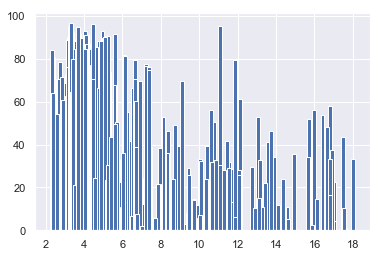

In [20]:
plt.bar(df['est_years'],df['rank'],width=0.2)